# Multiple Linear Regression

Exercício 2 referente à disciplina de Machine Learning.

In [93]:
%matplotlib inline

### Scikit learning multiple regression


In [109]:
import numpy as np
from sklearn import datasets, linear_model

grades = np.genfromtxt('sample_treino.csv', delimiter=',')

grades_x = grades[1:, 0:5]
cra = grades[1:, 5]

regr = linear_model.LinearRegression()
regr.fit(grades_x, cra)

print "Scikit regression intercept: {0}".format(regr.intercept_)
print "Scikit regression coefficients: {0}".format(regr.coef_)

Scikit regression intercept: 1.73771151379
Scikit regression coefficients: [ 0.10304143  0.0464367   0.16409834  0.38117843  0.02027816]


### Vectorized multiple regression code

In [101]:
import numpy as np
import time

def vector_norm(w):
    return np.sqrt(np.sum(w**2))

def RSS(w, H, y):
    x = (y - H.dot(w))
    return(x.transpose().dot(x))

def step_gradient(feature, target, w_current, learningRate):
    w_gradient = -2*feature.transpose().dot(target - feature.dot(w_current))
    new_w = w_current - (learningRate * w_gradient)
    
    norma = vector_norm(w_gradient)
    rss = RSS(new_w, feature, target)
    return [new_w, norma, rss]

def gradient_descent_runner(feature, target, starting_w, learning_rate, error_tolerance):
    w = starting_w
    norma = float("inf")
    rss_history = []
    norma_history = []
    
    it = 0
    while norma > error_tolerance:
        it += 1
        w, norma, rss = step_gradient(feature, target, w, learning_rate)
        if it%10 == 0:
            norma_history.append(norma)
            rss_history.append(rss)
    return [w, norma_history, rss_history]

def train_model(feature, target, initial_w, learning_rate, error_tolerance):
    w, norma_history, rss_history = gradient_descent_runner(feature, target, initial_w, learning_rate, error_tolerance)
    return [w, norma_history, rss_history]

def train_test_split(points, split_percent = 1):
    initial_w = np.zeros(points.shape[1])

    N = len(points)
    points = np.c_[np.ones(N), points][1:,:]
    N_split = (N-1)*split_percent
    n = (initial_w.shape[0])

    feature = points[:, 0:n]
    feature_train = feature[:N_split,0:n]
    feature_test = feature[N_split:N,0:n]
    
    target = points[:, n]
    target_train = target[:N_split]
    target_test = target[N_split:N]
    
    return [feature_train, target_train, feature_test, target_test, initial_w]

In [110]:
learning_rate = 0.00003
error_tolerance = 0.000001

points = np.genfromtxt('sample_treino.csv', delimiter=',')
feature_train, target_train, feature_test, target_test, initial_w = train_test_split(points, 1)

start_time = time.time()
w, norma_history, rss_history = train_model(feature_train, target_train, initial_w, learning_rate, error_tolerance)
print("--- %s seconds ---" % (time.time() - start_time))

print "Scikit regression coefficients: {0}".format(w)

--- 7.89198303223 seconds ---
Scikit regression coefficients: [ 1.7377107   0.10304145  0.04643674  0.16409834  0.38117847  0.02027817]


Plot of iterations x RSS and Norm through the training.

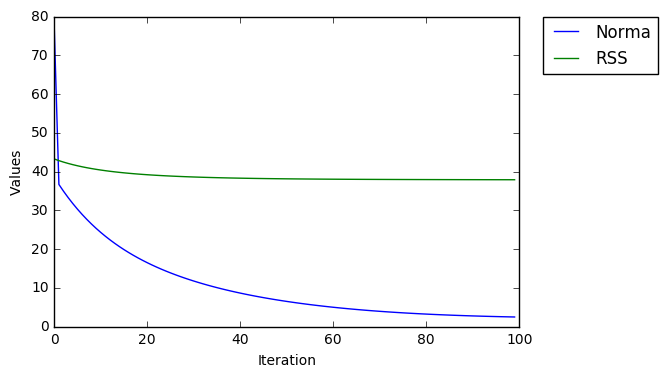

In [107]:
import matplotlib.pyplot as plt

plt.plot(norma_history[0:100], label = "Norm")
plt.plot(rss_history[0:100], label = "RSS")
plt.xlabel("Iteration")
plt.ylabel("Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### Train and test using the multiple linear regression model

Next, we build a model using 80% of data to train and 20% to test and then we compare the predictions results with the real CRA.

In [99]:
learning_rate = 0.00003
error_tolerance = 0.000001

points = np.genfromtxt('sample_treino.csv', delimiter=',')
feature_train, target_train, feature_test, target_test, initial_w = train_test_split(points, 0.8)

start_time = time.time()
w, norma_history, rss_history = train_model(feature_train, target_train, initial_w, learning_rate, error_tolerance)
print("--- %s seconds ---" % (time.time() - start_time))
print w

/home/allan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/allan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/allan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:51: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/allan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:52: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


--- 9.92107486725 seconds ---
[ 1.54853884  0.02030763  0.11595122  0.13799946  0.380147    0.08467159]


Predictions x Real CRA:

In [100]:
predicted = np.sum(feature_test * w, axis = 1)
predict_x_real_cra = np.c_[predicted, target_test]

print predict_x_real_cra

[[ 6.61020808  7.26746988]
 [ 6.15796598  7.25057471]
 [ 8.52995589  8.85058824]
 [ 7.12710992  6.41584158]
 [ 8.26004024  8.80235294]
 [ 7.16647488  5.7588785 ]
 [ 8.21199057  7.66923077]
 [ 6.77829935  5.58165138]
 [ 7.37118743  7.20786517]
 [ 7.47101269  6.90526316]
 [ 7.60018109  6.93195876]
 [ 6.78881258  7.40117647]
 [ 7.09427293  6.99550562]
 [ 6.83516398  6.9862069 ]
 [ 7.11692905  7.10224719]
 [ 6.82316871  7.28202247]
 [ 8.30854665  8.92470588]
 [ 7.26936984  7.3       ]]
